In [1]:
import ast
a_file = open("Filt_Resp_Birds_BCNN.txt", "r")
# a_file = open("Gibbon_panda.txt", "r")
# a_file = open("Gimagenet_Test_2.txt", "r")


string_without_line_breaks = ""
for line in a_file:
    stripped_line = line.rstrip()
    string_without_line_breaks += stripped_line

import re
dict_Classes = ast.literal_eval(re.search('({.+})', string_without_line_breaks).group(0))

# for key, value in dict_Classes.items():
#     print ('classId', key)
#     print ('value', value)
a_file.close()
#print(dict_Classes)

In [2]:
import collections
od = collections.OrderedDict(sorted(dict_Classes.items()))
list_b=[]
for item in od:
    print(item)
    list_b.append(item)

001.Black_footed_Albatross
002.Laysan_Albatross
003.Sooty_Albatross
004.Groove_billed_Ani
005.Crested_Auklet
006.Least_Auklet
007.Parakeet_Auklet
008.Rhinoceros_Auklet
009.Brewer_Blackbird
010.Red_winged_Blackbird
011.Rusty_Blackbird
012.Yellow_headed_Blackbird
013.Bobolink
014.Indigo_Bunting
015.Lazuli_Bunting
016.Painted_Bunting
017.Cardinal
018.Spotted_Catbird
019.Gray_Catbird
020.Yellow_breasted_Chat
021.Eastern_Towhee
022.Chuck_will_Widow
023.Brandt_Cormorant
024.Red_faced_Cormorant
025.Pelagic_Cormorant
026.Bronzed_Cowbird
027.Shiny_Cowbird
028.Brown_Creeper
029.American_Crow
030.Fish_Crow
031.Black_billed_Cuckoo
032.Mangrove_Cuckoo
033.Yellow_billed_Cuckoo
034.Gray_crowned_Rosy_Finch
035.Purple_Finch
036.Northern_Flicker
037.Acadian_Flycatcher
038.Great_Crested_Flycatcher
039.Least_Flycatcher
040.Olive_sided_Flycatcher
041.Scissor_tailed_Flycatcher
042.Vermilion_Flycatcher
043.Yellow_bellied_Flycatcher
044.Frigatebird
045.Northern_Fulmar
046.Gadwall
047.American_Goldfinch
048.Eu

In [3]:
import cv2
import os
from shutil import copyfile
from pathlib import Path


folder = "Birds_classes_top/"

last_fileName=""
#images = []
listBirds = []
for filename in os.listdir(folder):
    # for img in os.listdir(folder+filename):
    listBirds.append(filename)
    if filename not in list_b:
        print(filename)
# imagesFileNames.sort()
print(len(listBirds))

200


# Computing the similarity between classes; pearson or cosine distances might be used

In [4]:
from scipy.spatial import distance
import collections


import numpy as np
from keras import backend as K
import os
import scipy as sp

import matplotlib.pyplot as plt
import networkx as nx

# G = nx.Graph()
G = nx.Graph()
# draw_graph(G)
# thresh = 0.5
thresh = 1
# print(' length dict', len(dict_Classes))
class_index =0
adjacency_Matrix = []
for key, value in dict_Classes.items():
    list_of_close_nodes = []
    list_of_close_nodes_names = []
    list_of_close_nodes_sim = []
    simil_dict = {}
    listBirdsLabels =[]

#         list_of_close_nodes_sim.append(100)
    start_trans_sim = 100 #big value
#         print ('key: ',key )
    class_index +=1
    weights_dic_Conv2_13= {}
    weights_dic_Conv2_13.update(value)
    weights_dic_Conv2_13 = sorted (weights_dic_Conv2_13.items ())
    odList = []
    od = collections.OrderedDict(weights_dic_Conv2_13)
    for i in range(len(od)):
        if weights_dic_Conv2_13[i][1][0] >0:
            odList.append(weights_dic_Conv2_13[i][1][0]) 
        else:
#             odList.append(0)
            odList.append(weights_dic_Conv2_13[i][1][0]) 
    arry_by_object =[]
#     print("Top similar birds to", key)

    for key2, value2 in dict_Classes.items():
        if (key != key2 ):
            weights_dic_Conv2_13_2= {}
    #         print ('Key:', key)
    #         if key != key2 : #classs_Id 
            weights_dic_Conv2_13_2.update(value2)
            weights_dic_Conv2_13_2 = sorted (weights_dic_Conv2_13_2.items ())
    #         sorted (weights_dic_Conv2_13, key=lambda kv: kv[1], reverse=True)
    #         sorted (weights_dic_Conv2_13_2, key=lambda kv: kv[1], reverse=True)

            totalProb = 0
            totalProb2 = 0
            totalSimilarity = 0

            for i in range(len(weights_dic_Conv2_13)):
            #     print('value:', weights_dic_Conv2_13_Umb1[i][0])
                if weights_dic_Conv2_13[i][1][0] > 0:
                    totalProb =  totalProb + weights_dic_Conv2_13[i][1][0]
    #             print('tot prob1', totalProb)
#                 else:
#                     weights_dic_Conv2_13[i][1][0] = 0

            for i in range(len(weights_dic_Conv2_13_2)):
            #     print('value:', weights_dic_Conv2_13_Umb1[i][0])
                if weights_dic_Conv2_13_2[i][1][0] > 0:
                    totalProb2 =  totalProb2 + weights_dic_Conv2_13_2[i][1][0]
    #         print('total prob2', totalProb2)
#                 else:
#                     weights_dic_Conv2_13[i][1][0] = 0            
            od2 = collections.OrderedDict(weights_dic_Conv2_13_2)
            # ### Product
            # for i in range(len(od)):
            #     totalSimilarity += od[i][0] * od2[i][0]
            #### Distance
            od2List = []
            for i in range(len(od)):
                if weights_dic_Conv2_13_2[i][1][0] >0:
                    od2List.append(weights_dic_Conv2_13_2[i][1][0])
                else:
#                     od2List.append(0)
                    od2List.append(weights_dic_Conv2_13_2[i][1][0])
#             from scipy.spatial.distance import euclidean
#             if totalProb>0 and totalProb2>0:
#                 newList1 = [x / totalProb for x in odList]
#                 newList2 = [x / totalProb2 for x in od2List]
#                 totalSimilarity = euclidean(newList1, newList2)
                
#             totalSimilarity = distance.cosine(odList, od2List) # One edge value
            if totalProb>0 and totalProb2>0:
#                 for i in range(len(od)):
#                     totalSimilarity += abs((odList[i]/totalProb) - (od2List[i]/totalProb2))
    ################## pearson correlation
                from scipy.stats import pearsonr
                totalSimilarity, _ = pearsonr(odList, od2List)
    #                 print('Pearsons correlation: %.3f' % corr)
    ################# perason correlation
            if(totalSimilarity <= thresh):
#                     print('total sim between '+ key+ 'and '+ key2+ ':', totalSimilarity)                
                G.add_edge(key, key2, weight=round(totalSimilarity, 6), name = 'weight', title=round(totalSimilarity, 6))
#                     list_of_close_nodes.append(0,key2)
#                     list_of_close_nodes_sim.append(0,totalSimilarity)
                if weights_dic_Conv2_13_2[0][1][0] > 0:
                    simil_dict[key2]= totalSimilarity 
#     simil_dict = sorted(simil_dict.items(), key=lambda item: item[1])
    simil_dict = sorted(simil_dict.items(), key=lambda item: item[1], reverse=True)

#         dogs_file = open("list_imgnet_labels.txt", "r")
    if len(simil_dict)>0 :
        print("Top similar birds to", key)
        for k in range (3):            
#                 print(k+1 , "- " )
            print('sim value %.3f' % simil_dict[k][1])
            print( k+1 , "- ", simil_dict[k][0])
#                 print(k+1 , "- " ,simil_dict[k][1])
#         with open("Birds_Synset.txt", 'r') as read_obj:
#             for line in listBirds:
#                 print("line: ", line)
#                 print("dict", simil_dict[i][0])
#                 if(simil_dict[i][0] in line):
# #                         print(line.partition(stringToSplitAfter)[2])
#                     listBirdsLabels.append(line)
#                     break;
#     for i in range(len(listBirdsLabels)):
#          print( i+1, ". ", listBirdsLabels[i])
        print("---------------------------------------------")

Using TensorFlow backend.


Top similar birds to 001.Black_footed_Albatross
sim value 0.469
1 -  045.Northern_Fulmar
sim value 0.322
2 -  137.Cliff_Swallow
sim value 0.315
3 -  051.Horned_Grebe
---------------------------------------------
Top similar birds to 002.Laysan_Albatross
sim value 0.534
1 -  041.Scissor_tailed_Flycatcher
sim value 0.516
2 -  084.Red_legged_Kittiwake
sim value 0.486
3 -  045.Northern_Fulmar
---------------------------------------------
Top similar birds to 003.Sooty_Albatross
sim value 0.461
1 -  071.Long_tailed_Jaeger
sim value 0.356
2 -  001.Black_footed_Albatross
sim value 0.305
3 -  009.Brewer_Blackbird
---------------------------------------------
Top similar birds to 004.Groove_billed_Ani
sim value 0.446
1 -  052.Pied_billed_Grebe
sim value 0.302
2 -  135.Bank_Swallow
sim value 0.293
3 -  119.Field_Sparrow
---------------------------------------------
Top similar birds to 006.Least_Auklet
sim value 0.280
1 -  065.Slaty_backed_Gull
sim value 0.277
2 -  080.Green_Kingfisher
sim value

Top similar birds to 083.White_breasted_Kingfisher
sim value 0.427
1 -  024.Red_faced_Cormorant
sim value 0.403
2 -  139.Scarlet_Tanager
sim value 0.389
3 -  048.European_Goldfinch
---------------------------------------------
Top similar birds to 084.Red_legged_Kittiwake
sim value 0.495
1 -  045.Northern_Fulmar
sim value 0.488
2 -  064.Ring_billed_Gull
sim value 0.476
3 -  066.Western_Gull
---------------------------------------------
Top similar birds to 085.Horned_Lark
sim value 0.670
1 -  114.Black_throated_Sparrow
sim value 0.638
2 -  118.House_Sparrow
sim value 0.607
3 -  132.White_crowned_Sparrow
---------------------------------------------
Top similar birds to 086.Pacific_Loon
sim value 0.488
1 -  052.Pied_billed_Grebe
sim value 0.479
2 -  178.Swainson_Warbler
sim value 0.393
3 -  111.Loggerhead_Shrike
---------------------------------------------
Top similar birds to 087.Mallard
sim value 0.526
1 -  070.Green_Violetear
sim value 0.429
2 -  168.Kentucky_Warbler
sim value 0.369

Top similar birds to 059.California_Gull
sim value 0.618
1 -  084.Red_legged_Kittiwake
sim value 0.544
2 -  041.Scissor_tailed_Flycatcher
sim value 0.507
3 -  061.Heermann_Gull
---------------------------------------------
Top similar birds to 067.Anna_Hummingbird
sim value 0.574
1 -  068.Ruby_throated_Hummingbird
sim value 0.558
2 -  070.Green_Violetear
sim value 0.359
3 -  046.Gadwall
---------------------------------------------
Top similar birds to 068.Ruby_throated_Hummingbird
sim value 0.574
1 -  067.Anna_Hummingbird
sim value 0.481
2 -  070.Green_Violetear
sim value 0.446
3 -  046.Gadwall
---------------------------------------------
Top similar birds to 072.Pomarine_Jaeger
sim value 0.347
1 -  001.Black_footed_Albatross
sim value 0.343
2 -  068.Ruby_throated_Hummingbird
sim value 0.324
3 -  071.Long_tailed_Jaeger
---------------------------------------------
Top similar birds to 082.Ringed_Kingfisher
sim value 0.591
1 -  080.Green_Kingfisher
sim value 0.509
2 -  078.Gray_Kingbi

Top similar birds to 096.Hooded_Oriole
sim value 0.690
1 -  139.Scarlet_Tanager
sim value 0.629
2 -  055.Evening_Grosbeak
sim value 0.629
3 -  048.European_Goldfinch
---------------------------------------------
Top similar birds to 098.Scott_Oriole
sim value 0.691
1 -  169.Magnolia_Warbler
sim value 0.588
2 -  055.Evening_Grosbeak
sim value 0.522
3 -  048.European_Goldfinch
---------------------------------------------
Top similar birds to 099.Ovenbird
sim value 0.428
1 -  120.Fox_Sparrow
sim value 0.422
2 -  123.Henslow_Sparrow
sim value 0.388
3 -  081.Pied_Kingfisher
---------------------------------------------
Top similar birds to 102.Western_Wood_Pewee
sim value 0.614
1 -  078.Gray_Kingbird
sim value 0.576
2 -  118.House_Sparrow
sim value 0.480
3 -  037.Acadian_Flycatcher
---------------------------------------------
Top similar birds to 103.Sayornis
sim value 0.646
1 -  102.Western_Wood_Pewee
sim value 0.643
2 -  118.House_Sparrow
sim value 0.623
3 -  078.Gray_Kingbird
---------

Top similar birds to 175.Pine_Warbler
sim value 0.622
1 -  077.Tropical_Kingbird
sim value 0.578
2 -  055.Evening_Grosbeak
sim value 0.568
3 -  139.Scarlet_Tanager
---------------------------------------------
Top similar birds to 176.Prairie_Warbler
sim value 0.762
1 -  169.Magnolia_Warbler
sim value 0.675
2 -  175.Pine_Warbler
sim value 0.627
3 -  139.Scarlet_Tanager
---------------------------------------------
Top similar birds to 178.Swainson_Warbler
sim value 0.470
1 -  031.Black_billed_Cuckoo
sim value 0.436
2 -  043.Yellow_bellied_Flycatcher
sim value 0.418
3 -  068.Ruby_throated_Hummingbird
---------------------------------------------
Top similar birds to 181.Worm_eating_Warbler
sim value 0.502
1 -  178.Swainson_Warbler
sim value 0.437
2 -  123.Henslow_Sparrow
sim value 0.419
3 -  099.Ovenbird
---------------------------------------------
Top similar birds to 182.Yellow_Warbler
sim value 0.618
1 -  077.Tropical_Kingbird
sim value 0.584
2 -  119.Field_Sparrow
sim value 0.556
3

Top similar birds to 005.Crested_Auklet
sim value 0.474
1 -  024.Red_faced_Cormorant
sim value 0.429
2 -  055.Evening_Grosbeak
sim value 0.395
3 -  139.Scarlet_Tanager
---------------------------------------------
Top similar birds to 009.Brewer_Blackbird
sim value 0.506
1 -  151.Black_capped_Vireo
sim value 0.407
2 -  200.Common_Yellowthroat
sim value 0.389
3 -  120.Fox_Sparrow
---------------------------------------------
Top similar birds to 026.Bronzed_Cowbird
sim value 0.422
1 -  009.Brewer_Blackbird
sim value 0.373
2 -  199.Winter_Wren
sim value 0.361
3 -  057.Rose_breasted_Grosbeak
---------------------------------------------
Top similar birds to 011.Rusty_Blackbird
sim value 0.735
1 -  009.Brewer_Blackbird
sim value 0.459
2 -  199.Winter_Wren
sim value 0.451
3 -  120.Fox_Sparrow
---------------------------------------------
Top similar birds to 010.Red_winged_Blackbird
sim value 0.557
1 -  057.Rose_breasted_Grosbeak
sim value 0.530
2 -  048.European_Goldfinch
sim value 0.501
3

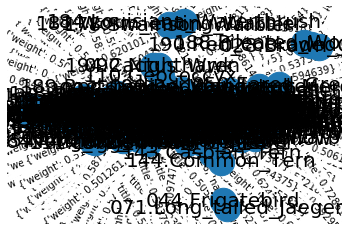

In [15]:
# import matplotlib.pyplot as plt
# import networkx as nx

# elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.9]
# # esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

# pos = nx.spring_layout(G)  # positions for all nodes

# # nodes
# nx.draw_networkx_nodes(G, pos, node_size=700)

# # edges
# # edge_labels = nx.get_edge_attributes(G, 'name')
# # nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)
# nx.draw_networkx_edge_labels(G, pos, edgelist=elarge, width=3)

# # nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3)
# #delete edges with low similaaities
# # nx.draw_networkx_edges(
# #     G, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed"
# # ) 


# # labels
# nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

# plt.axis("off")
# plt.show()

In [16]:
from pyvis.network import Network
net = Network(notebook= True)
# load the network graph
net.from_nx(G)
net.show("exampBirdsCUB.html")